## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
##Example: Loading MNIST dataset
import keras
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

Using TensorFlow backend.


4431872/4422102 [==============================] - 4s 1us/step


### Find no.of samples are there in training and test datasets

In [3]:
print(trainX.shape)
print(testX.shape)

(60000, 28, 28)
(10000, 28, 28)


### Find dimensions of an image in the dataset

In [4]:
trainX[1].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(trainY)
y_test = np_utils.to_categorical(testY)
num_classes = y_test.shape[1]

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
X_train = trainX / 255
X_test = testX / 255

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.layers.core import Flatten, Dense, Activation,Dropout
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=30`. **

In [24]:
model = keras.Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1))) 
#model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(Convolution2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#model.fit(X_train,y_train,validation_data =()X_test,Y_test),batch_size=64,epochs=30)

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train,y_train,validation_data =(X_test,y_test),batch_size=64,epochs=30,  callbacks=[early_stopping])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 3,222,250
Trainable params: 3,222,250
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 15s 256us/step - loss: 1

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [25]:


model = keras.Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1))) 

model.add(Convolution2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train,y_train,validation_data =(X_test,y_test),batch_size=64,epochs=30,  callbacks=[early_stopping])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total para

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

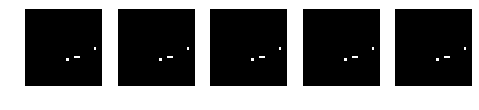

In [28]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [37]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit_generator(datagen.flow(X_train, y_train,
                        batch_size=64),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=30,
                        validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/30
  8/937 [..............................] - ETA: 16s - loss: 4.2229 - acc: 0.5215

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., steps_per_epoch=937, epochs=30, callbacks=[<keras.ca...)`
  import sys


937/937 [==============================] - 17s 18ms/step - loss: 1.3888 - acc: 0.4965 - val_loss: 2.1398 - val_acc: 0.2964
Epoch 2/30
937/937 [==============================] - 18s 19ms/step - loss: 1.2580 - acc: 0.5346 - val_loss: 2.1927 - val_acc: 0.2131
Epoch 3/30
937/937 [==============================] - 18s 19ms/step - loss: 1.2333 - acc: 0.5420 - val_loss: 2.2236 - val_acc: 0.1867
Epoch 4/30
937/937 [==============================] - 18s 19ms/step - loss: 1.2156 - acc: 0.5518 - val_loss: 2.2579 - val_acc: 0.1619
Epoch 5/30
937/937 [==============================] - 18s 19ms/step - loss: 1.2034 - acc: 0.5562 - val_loss: 2.2724 - val_acc: 0.1348
Epoch 6/30
937/937 [==============================] - 18s 19ms/step - loss: 1.1907 - acc: 0.5596 - val_loss: 2.2814 - val_acc: 0.1254


###  Report the final train and validation accuracy

In [0]:
Accuracy - 56%